In [28]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

In [29]:
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [30]:
#To compute de climatoloy
yearC1='2004'
yearC2='2014'

# Read data

In [31]:
RG_temp      = xr.open_dataset('./Data/RG_temp_global_2000dbar.nc')
RG_temp_anom = xr.open_dataset('./Data/RG_temp_anom_global_2000dbar.nc')

In [32]:
EN422g10_temp      = xr.open_dataset('./Data/EN422g10_temp_global_2000m.nc')
EN422g10_temp_anom = xr.open_dataset('./Data/EN422g10_temp_anom_global_2000m.nc')

In [37]:
ISAS20_temp      = xr.open_dataset('./Data/ISAS20_temp_global_2000m.nc')
ISAS20_temp_anom = xr.open_dataset('./Data/ISAS20_temp_anom_global_2000m.nc')

In [7]:
RG_temp

<xarray.Dataset> Size: 3kB
Dimensions:      (time: 240)
Coordinates:
  * time         (time) datetime64[ns] 2kB 2004-01-15 2004-02-15 ... 2023-12-15
Data variables:
    temperature  (time) float32 960B ...

In [41]:
offSet1=EN422g10_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()-RG_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()
offSet2=EN422g10_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()-ISAS20_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()


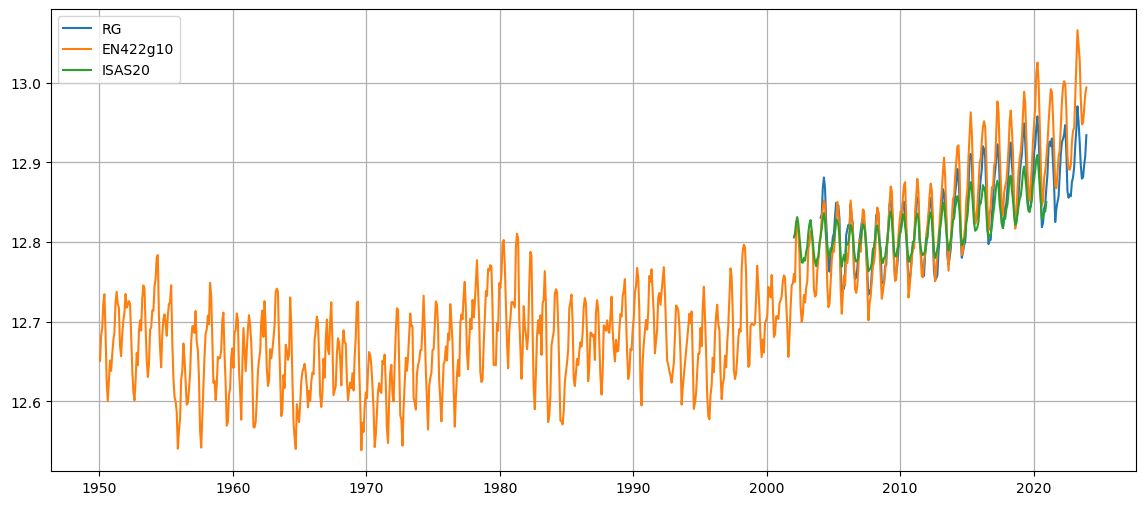

In [42]:
ig, ax = plt.subplots(figsize = (14,6))
ax.plot(RG_temp.time,RG_temp.temperature+offSet1, label='RG')
ax.plot(EN422g10_temp.time,EN422g10_temp.temperature, label='EN422g10')
ax.plot(ISAS20_temp.time,ISAS20_temp.temperature+offSet2, label='ISAS20')
ax.grid(linestyle='-', linewidth=.9)
ax.legend()

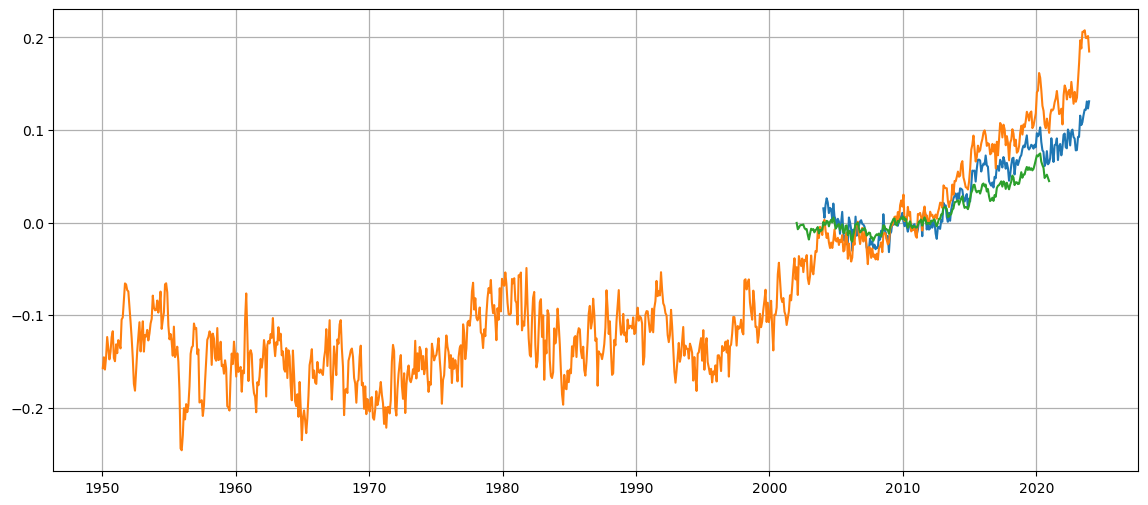

In [39]:
offSet=EN422g10_temp_anom.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()-RG_temp_anom.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()

ig, ax = plt.subplots(figsize = (14,6))
ax.plot(RG_temp_anom.time,RG_temp_anom.temperature + offSet)
ax.plot(EN422g10_temp_anom.time,EN422g10_temp_anom.temperature)
ax.plot(ISAS20_temp_anom.time,ISAS20_temp_anom.temperature)
ax.grid(linestyle='-', linewidth=.9)